In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
import numpy as np 

In [26]:
#lectura del archivo csv
ruta = './dataset_banco_clean_s.csv'
data = pd.read_csv(ruta, encoding="latin1", sep=';')
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000
mean,40.936445,1374.012149,15.807188,258.115006,2.763283,40.178893,0.574166
std,10.618502,3924.370039,8.322549,257.349601,3.096579,100.107295,1.907950
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


In [27]:
data.head() # Sirve para mostrar la parte inicial de los datos 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


C:\Users\HP\AppData\Local\Temp\ipykernel_20724\2242975426.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['loan'],1).hist()


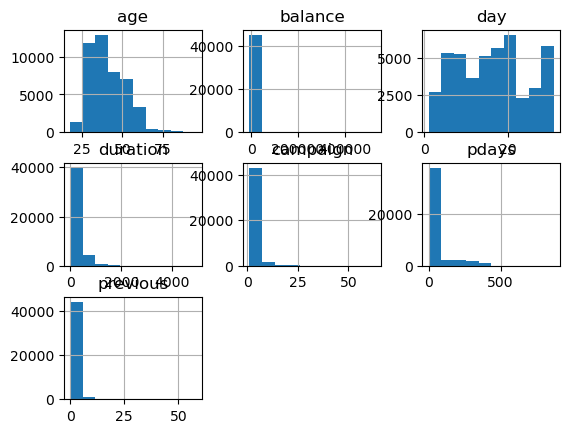

In [31]:
#Visualización de Datos
data.drop(['loan'],1).hist()
plt.show()

In [33]:
x = data[['age']]
y = data['loan']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
# Modelo de regresion Logistica
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [50]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.84      1.00      0.91      7570
         yes       0.00      0.00      0.00      1468

    accuracy                           0.84      9038
   macro avg       0.42      0.50      0.46      9038
weighted avg       0.70      0.84      0.76      9038



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# Crear la Matriz de Confusión para evaluar la clasificación realizada
from sklearn.metrics import confusion_matrix as CM
cm = CM(y_test, y_pred)
cm

array([[7570,    0],
       [1468,    0]], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


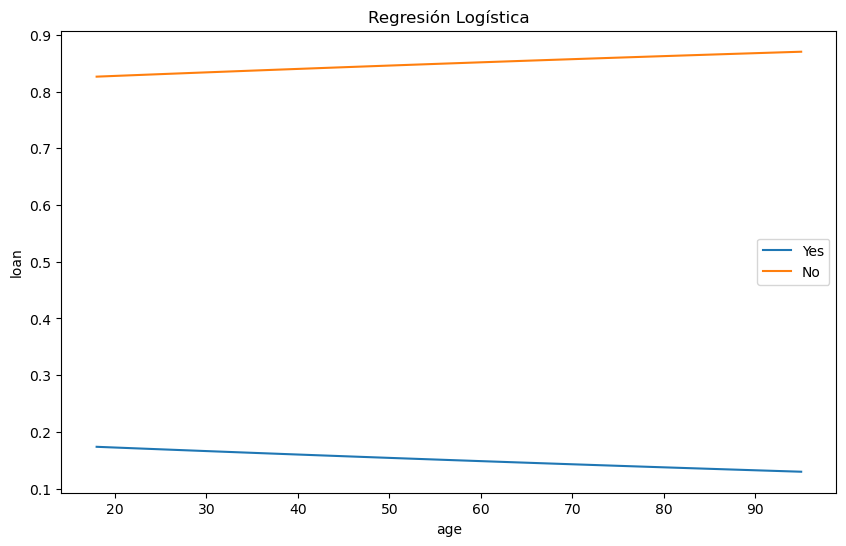

In [52]:
age_range = np.arange(x['age'].min(), x['age'].max() + 1).reshape(-1, 1)
probabilities = model.predict_proba(age_range)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(age_range, probabilities[:, 1], label='Yes') 
plt.plot(age_range, probabilities[:, 0], label='No')  
plt.xlabel('age')
plt.ylabel('loan')
plt.title('Regresión Logística')
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.8375746846647488


# Referencias

https://www.statdeveloper.com/regresion-logistica-en-python/ - https://github.com/PabloRR100/Curso-Machine-Learning-Esp/blob/master/4%20-%20Aprendizaje%20Supervisado/4.2.%20Clasificaci%C3%B3n/4.2.1%20-%20Regresi%C3%B3n%20Log%C3%ADsitca/4.2.1%20Regresi%C3%B3n%20Log%C3%ADstica%20-%20Python.ipynb - https://aprendeia.com/algoritmo-regresion-logistica-machine-learning-practica-con-python/ - https://www.jacobsoft.com.mx/es_mx/regresion-logistica/